In [1]:
import sys
# setting path
sys.path.append("/home/ky2446/simclr")
sys.path.append("/home/ky2446/simclr/simclr")
sys.path.append("/home/ky2446/simclr/simclr/layers")
sys.path.append("/home/ky2446/simclr/simclr/models")
sys.path.append("/home/ky2446/simclr/simclr/loss")
sys.path.append("/home/ky2446/simclr/simclr/optim")
sys.path.append("/home/ky2446/simclr/simclr/dataloader")

In [2]:
from simclrpy import SimClr
from ntxent import nt_xent_loss
from ntxentgit import SimCLR_Loss
from augment import TransformsSimCLR
from utils import *
from LARS import LARS
from downstream import DownStream
from dataloader import *

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
train_loader_simclr = train_loader_simclr("CIFAR10",256)
test_loader = test_loader("CIFAR10",256)
test_images, test_labels = get_testimgs_list("CIFAR10")

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [5]:
proj_dim = 128
model = SimClr('resnet50',proj_dim).cuda()
temperature = 0.5
#criterion = nt_xent_loss
criterion = SimCLR_Loss(256,0.5)
optimizer = "Adam"
model, train_loss = train_simclr(train_loader_simclr,model,criterion,optimizer,100,256,True,"/home/ky2446/saved-models/CIFAR10-RES50-SIMCLR-BS256-PD128-ADAM")

Epoch: 0, step: 50/195, loss: 6.150359630584717
Epoch: 0, step: 100/195, loss: 6.0384521484375
Epoch: 0, step: 150/195, loss: 6.000555992126465
Epoch: 0 completed, average loss: 6.052601618644519, time taken: 0.8012946367263794 mins
Epoch: 1, step: 50/195, loss: 5.798166275024414
Epoch: 1, step: 100/195, loss: 5.81621789932251
Epoch: 1, step: 150/195, loss: 5.8592047691345215
Epoch: 1 completed, average loss: 5.834396826915252, time taken: 0.8032711903254192 mins
Epoch: 2, step: 50/195, loss: 5.612818717956543
Epoch: 2, step: 100/195, loss: 5.656363487243652
Epoch: 2, step: 150/195, loss: 5.499610424041748
Epoch: 2 completed, average loss: 5.604299682225936, time taken: 0.7953183611234029 mins
Epoch: 3, step: 50/195, loss: 5.563931465148926
Epoch: 3, step: 100/195, loss: 5.420185089111328
Epoch: 3, step: 150/195, loss: 5.338785171508789
Epoch: 3 completed, average loss: 5.461352837391389, time taken: 0.8009320855140686 mins
Epoch: 4, step: 50/195, loss: 5.387442111968994
Epoch: 4, step

Epoch: 34, step: 150/195, loss: 4.902768135070801
Epoch: 34 completed, average loss: 4.880195568769406, time taken: 0.8002978165944418 mins
Epoch: 35, step: 50/195, loss: 4.887157917022705
Epoch: 35, step: 100/195, loss: 4.863816261291504
Epoch: 35, step: 150/195, loss: 4.9265666007995605
Epoch: 35 completed, average loss: 4.878463331858317, time taken: 0.8001448671023051 mins
Epoch: 36, step: 50/195, loss: 4.87167501449585
Epoch: 36, step: 100/195, loss: 4.8794169425964355
Epoch: 36, step: 150/195, loss: 4.881394863128662
Epoch: 36 completed, average loss: 4.876928554437099, time taken: 0.794616448879242 mins
Epoch: 37, step: 50/195, loss: 4.872248649597168
Epoch: 37, step: 100/195, loss: 4.860519886016846
Epoch: 37, step: 150/195, loss: 4.862237453460693
Epoch: 37 completed, average loss: 4.872716514880841, time taken: 0.8017743508021037 mins
Epoch: 38, step: 50/195, loss: 4.837864875793457
Epoch: 38, step: 100/195, loss: 4.851483345031738
Epoch: 38, step: 150/195, loss: 4.8390908241

Epoch: 69, step: 50/195, loss: 4.788209915161133
Epoch: 69, step: 100/195, loss: 4.81897497177124
Epoch: 69, step: 150/195, loss: 4.811679363250732
Epoch: 69 completed, average loss: 4.800909352913881, time taken: 0.8029575347900391 mins
Epoch: 70, step: 50/195, loss: 4.835277557373047
Epoch: 70, step: 100/195, loss: 4.796479225158691
Epoch: 70, step: 150/195, loss: 4.816190719604492
Epoch: 70 completed, average loss: 4.7982320100833205, time taken: 0.8006114959716797 mins
Epoch: 71, step: 50/195, loss: 4.7711591720581055
Epoch: 71, step: 100/195, loss: 4.7945756912231445
Epoch: 71, step: 150/195, loss: 4.848984241485596
Epoch: 71 completed, average loss: 4.7986348861303085, time taken: 0.7942213177680969 mins
Epoch: 72, step: 50/195, loss: 4.858119010925293
Epoch: 72, step: 100/195, loss: 4.783542156219482
Epoch: 72, step: 150/195, loss: 4.86182975769043
Epoch: 72 completed, average loss: 4.801144066835061, time taken: 0.8001745025316874 mins
Epoch: 73, step: 50/195, loss: 4.736102104

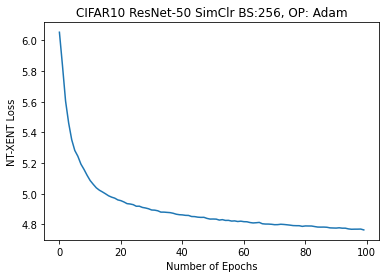

In [6]:
plt.xlabel("Number of Epochs")
plt.ylabel("NT-XENT Loss")
plt.title("CIFAR10 ResNet-50 SimClr BS:256, OP: Adam")
plt.plot(train_loss)
plt.savefig("/home/ky2446/figures/CIFAR10-RES50-SIMCLR-BS256-PD128-ADAM.png")

In [8]:
with open("/home/ky2446/training-logs/CIFAR10-RES50-SIMCLR-BS256-PD128-ADAM", "wb") as fp: 
    pickle.dump(train_loss, fp)